In [1]:
!pip install pycocotools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd 
import os
from pycocotools.coco import COCO
import skimage.io as io
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
dataDir=Path('./drive/MyDrive/train')
annFile = Path('./drive/MyDrive/train/_annotations.coco.json')
coco = COCO(annFile)
imgIds = coco.getImgIds()
cats = coco.loadCats(coco.getCatIds())
tt = coco.loadAnns(coco.getAnnIds())
tt = [t['category_id'] for t in tt]
from collections import Counter
print(Counter(tt).values())
categories = [cat['name'] for cat in cats]
print(f"\nКоличество категорий: {len(categories)}\n")
print(f"Категории: {categories}")

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
dict_values([11, 12, 15, 17])

Количество категорий: 5

Категории: ['dogs-cats-birds-horse', 'bird', 'cat', 'corgi', 'horse']


Картинок всего 50, аннотаций получилось 55, т.к. были картинки, на которы по несколько объектов класса.

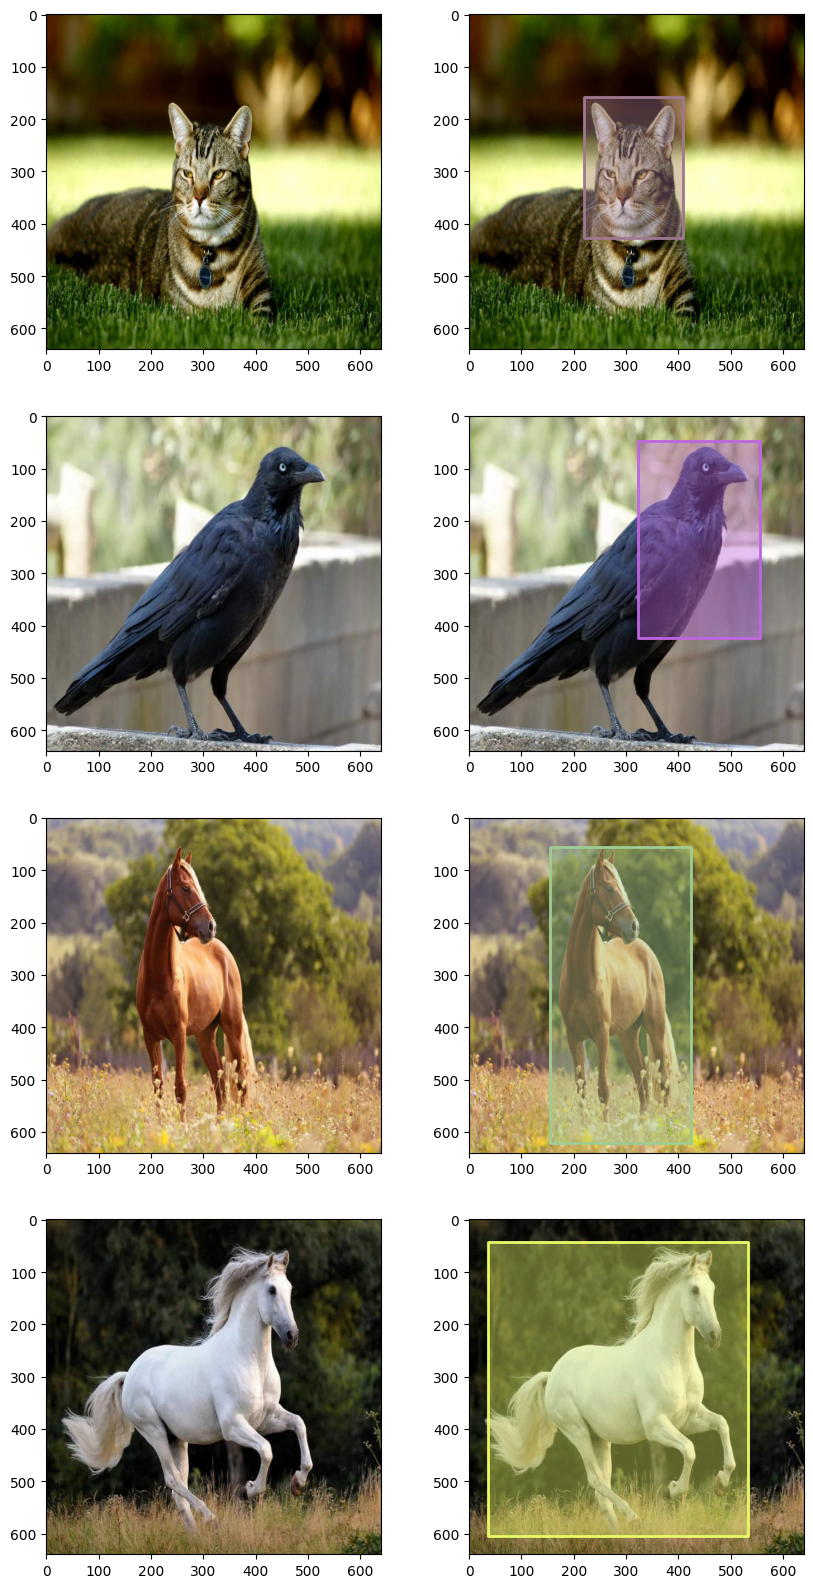

In [6]:
imgs = coco.loadImgs(imgIds[13:17])
_,axs = plt.subplots(len(imgs),2,figsize=(10,5 * len(imgs)))
for img, ax in zip(imgs, axs):
    I = io.imread(dataDir/img['file_name'])
    annIds = coco.getAnnIds(imgIds=[img['id']])
    anns = coco.loadAnns(annIds)
    ax[0].imshow(I)
    ax[1].imshow(I)
    plt.sca(ax[1])
    coco.showAnns(anns, draw_bbox=True)